In [ ]:
# https://github.com/DEEPI-LAB/python-TensorFlow-Tutorials

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.models import Model

In [11]:
# 사전 학습된 모델 불러오기
input_tensor = Input(shape=(150,150,3))
model = VGG16(weights=None, include_top=False, input_tensor = input_tensor)

# 모델 Layer 데이터화
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Layer 추가
x = layer_dict['block5_pool'].output
# Cov2D Layer +
x = Conv2D(filters = 64, kernel_size=(3, 3), activation='relu')(x)
# MaxPooling2D Layer +
x = MaxPooling2D(pool_size=(2, 2))(x)
# Flatten Layer +
x = Flatten()(x)
# FC Layer +
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

In [12]:
# new model 정의
new_model = Model(inputs = model.input, outputs = x)

# CNN Pre-trained 가중치를 그대로 사용할때
for layer in new_model.layers[:19] :
    layer.trainable = False

new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [13]:
# 컴파일 옵션
new_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])


In [18]:
# 테스트 데이터 (고양이/강아지)
train_dir ='/Users/inkyung/Desktop/IT_Projects/ttproject/ik_test/VGG16_data/노출trainset'
test_dir = '/Users/inkyung/Desktop/IT_Projects/ttproject/ik_test/VGG16_data/노출testset'

# 폴더에 따라 자동 분류
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


# 데이터 구조 생성
train_data_gen = train_image_generator.flow_from_directory(batch_size=10,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150, 150),
                                                           class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=10,
                                                         directory=test_dir,
                                                         target_size=(150, 150),
                                                         class_mode='binary')

Found 1060 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [15]:
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [8]:
pip install keras --upgrade

Note: you may need to restart the kernel to use updated packages.


In [19]:
# 모델 학습
history = new_model.fit(train_data_gen, epochs=3,
                        validation_data=test_data_gen)

new_model.save("VGG16_test")


Epoch 1/3


2023-05-15 16:27:30.334408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


106/106 [==============================] - ETA: 0s - loss: 0.6954 - accuracy: 0.4726

2023-05-15 16:30:23.912656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


106/106 [==============================] - 182s 2s/step - loss: 0.6954 - accuracy: 0.4726 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/3
106/106 [==============================] - 168s 2s/step - loss: 0.6938 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/3
106/106 [==============================] - 166s 2s/step - loss: 0.6947 - accuracy: 0.4708 - val_loss: 0.6932 - val_accuracy: 0.5000


2023-05-15 16:36:08.754176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,2048]
	 [[{{node inputs}}]]
2023-05-15 16:36:08.776873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1024]
	 [[{{node inputs}}]]
2023-05-15 16:36:09.961511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,2048]
	 [[{{node inputs}}]]
2023-05-15 16

INFO:tensorflow:Assets written to: VGG16_test/assets


INFO:tensorflow:Assets written to: VGG16_test/assets


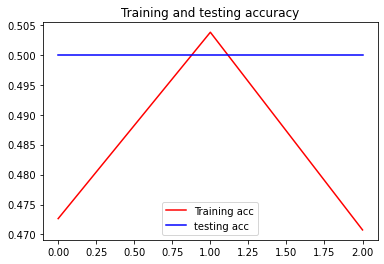

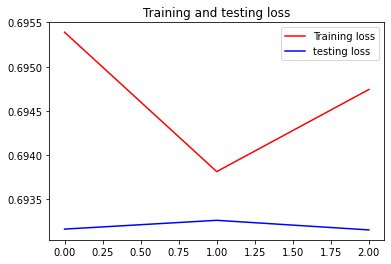

In [20]:
# 최종 결과 리포트
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

from matplotlib import pyplot as plt

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='testing acc')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='testing loss')
plt.title('Training and testing loss')
plt.legend()

plt.show()

In [21]:
new_model.save_weights("VGG16_test")

In [ ]:
# 모델 불러오기
from keras.models import load_model

new_model = load_model("VGG16_test.h5")